# Day 12 — Visualizing US Accident Hotspots


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (CSV path)
dataset_path = r"D:\Infosys SpringBoard Virtual Internship 6.0\US_Accidents_March23.csv"
df = pd.read_csv(dataset_path)

# Inspect geolocation columns
df[['Start_Lat', 'Start_Lng']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Start_Lat  float64
 1   Start_Lng  float64
dtypes: float64(2)
memory usage: 117.9 MB


## Step 1 — Handle Missing Geolocation Data
- Drop rows with missing `Start_Lat` or `Start_Lng`.
- Optional: Remove duplicate geolocations to reduce plotting overload.


In [2]:
df_geo = df.dropna(subset=['Start_Lat', 'Start_Lng']).copy()
df_geo = df_geo.drop_duplicates(subset=['Start_Lat', 'Start_Lng'])
print(f"Number of rows after dropping missing/duplicate geolocations: {len(df_geo)}")


Number of rows after dropping missing/duplicate geolocations: 3003783


## Step 2 — Scatter Plot of Accident Locations
- Each point represents an accident location.
- `alpha` and `s` are adjusted for better visibility.


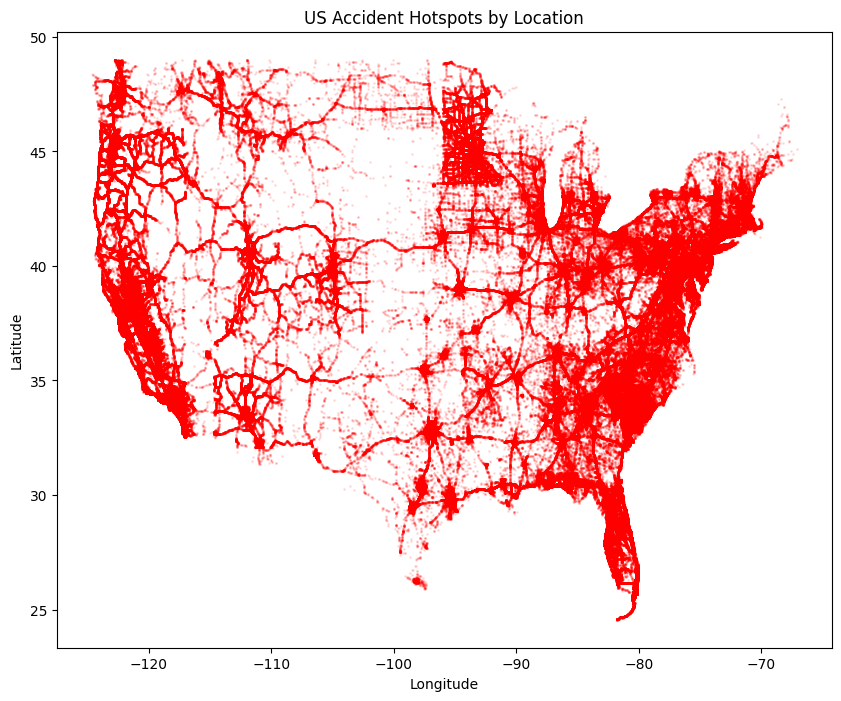

In [3]:
plt.figure(figsize=(10,8))
plt.scatter(df_geo['Start_Lng'], df_geo['Start_Lat'], alpha=0.1, s=1, color='red')
plt.title("US Accident Hotspots by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Step 3 — Density Plot (KDE) of Accidents
- Visualizes areas with high accident density.
- Use `fill=True` to avoid seaborn `shade` deprecation warning.


In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(
    x=df_geo['Start_Lng'],
    y=df_geo['Start_Lat'],
    fill=True,         # replaces deprecated `shade`
    cmap="Reds",
    bw_adjust=0.5
)
plt.title("Accident Density Map - US")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
